In [1]:
import sys
import os
sys.path.append("..")
os.chdir("/mnt/ialabnas/homes/ptflores1/UAI/")

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import equations.lcdm as lcdm
import equations.cpl as cpl
import equations.quintessence as quint
import equations.hs as hs
import plotters.lcdm as plcdm
import plotters.cpl as pcpl
import plotters.quintessence as pquint
import plotters.hs as phs

/mnt/ialabnas/homes/ptflores1/UAI/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/mnt/ialabnas/homes/ptflores1/UAI/venv/lib/python3.9/site-packages/torch/cuda/__init__.py:141: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11020). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
/mnt/ialabnas/homes/ptflores1/UAI/venv/lib/python3.9/site-packages/torch/__init__.py:696: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2

In [35]:
def _compute_hubble_lcdm_forward(data):
    hubble_an = lcdm.H_LCDM(data["x"], lcdm.Om_m_0, 65, data["analytic"])
    hubble_fcnn = lcdm.H_LCDM(data["x"], lcdm.Om_m_0, 65, data["FCNN"])
    hubble_bbb = lcdm.H_LCDM(data["x"], lcdm.Om_m_0, 65, data["BBB_samples"][0])
    hubble_nlm = lcdm.H_LCDM(data["x"], lcdm.Om_m_0, 65, data["NLM_samples"][0])
    hubble_hmc = lcdm.H_LCDM(data["x"], lcdm.Om_m_0, 65, data["HMC_samples"][0])
    return hubble_an, hubble_fcnn, hubble_bbb, hubble_nlm, hubble_hmc

def _compute_hubble_lcdm_bundle(data):
    z, Om_m_0 = data["x"][0].reshape(lcdm.bundle_plot_dimension_sizes), data["x"][1].reshape(lcdm.bundle_plot_dimension_sizes)

    hubble_an = lcdm.H_LCDM(z, Om_m_0, 65, data["analytic"].reshape(lcdm.bundle_plot_dimension_sizes))
    hubble_fcnn = lcdm.H_LCDM(z, Om_m_0, 65, data["FCNN"].reshape(lcdm.bundle_plot_dimension_sizes))
    hubble_bbb = lcdm.H_LCDM(z, Om_m_0, 65, data["BBB_samples"][0].reshape(-1, *lcdm.bundle_plot_dimension_sizes))
    hubble_nlm = lcdm.H_LCDM(z, Om_m_0, 65, data["NLM_samples"][0].reshape(-1, *lcdm.bundle_plot_dimension_sizes))
    hubble_hmc = lcdm.H_LCDM(z, Om_m_0, 65, data["HMC_samples"][0].reshape(-1, *lcdm.bundle_plot_dimension_sizes))
    return hubble_an, hubble_fcnn, hubble_bbb, hubble_nlm, hubble_hmc

def _compute_hubble_cpl_forward(data):
    hubble_an = cpl.H_CPL(data["x"], cpl.w_0, cpl.w_1, .3, 65, data["analytic"])
    hubble_fcnn = cpl.H_CPL(data["x"], cpl.w_0, cpl.w_1, .3, 65, data["FCNN"])
    hubble_bbb = cpl.H_CPL(data["x"], cpl.w_0, cpl.w_1, .3, 65, data["BBB_samples"][0])
    hubble_nlm = cpl.H_CPL(data["x"], cpl.w_0, cpl.w_1, .3, 65, data["NLM_samples"][0])
    hubble_hmc = cpl.H_CPL(data["x"], cpl.w_0, cpl.w_1, .3, 65, data["HMC_samples"][0])
    return hubble_an, hubble_fcnn, hubble_bbb, hubble_nlm, hubble_hmc

def _compute_hubble_cpl_bundle(data):
    z, w_0, w_1 = data["x"][0].reshape(cpl.bundle_plot_dimension_sizes), data["x"][1].reshape(cpl.bundle_plot_dimension_sizes), data["x"][2].reshape(cpl.bundle_plot_dimension_sizes)

    hubble_an = cpl.H_CPL(z, w_0, w_1, .3, 65, data["analytic"].reshape(cpl.bundle_plot_dimension_sizes))
    hubble_fcnn = cpl.H_CPL(z, w_0, w_1, .3, 65, data["FCNN"].reshape(cpl.bundle_plot_dimension_sizes))
    hubble_bbb = cpl.H_CPL(z, w_0, w_1, .3, 65, data["BBB_samples"][0].reshape(-1, *cpl.bundle_plot_dimension_sizes))
    hubble_nlm = cpl.H_CPL(z, w_0, w_1, .3, 65, data["NLM_samples"][0].reshape(-1, *cpl.bundle_plot_dimension_sizes))
    hubble_hmc = cpl.H_CPL(z, w_0, w_1, .3, 65, data["HMC_samples"][0].reshape(-1, *cpl.bundle_plot_dimension_sizes))
    return hubble_an, hubble_fcnn, hubble_bbb, hubble_nlm, hubble_hmc

def _compute_hubble_quint_forward(data):
    hubble_an = quint.H_quint(data["x"], 1, .3, 65, data["numerical"])
    hubble_fcnn = quint.H_quint(data["x"], 1, .3, 65, data["FCNN"])
    hubble_bbb = quint.H_quint(data["x"], 1, .3, 65, data["BBB_samples"])
    hubble_nlm = quint.H_quint(data["x"], 1, .3, 65, data["NLM_samples"])
    hubble_hmc = quint.H_quint(data["x"], 1, .3, 65, data["HMC_samples"])
    return hubble_an, hubble_fcnn, hubble_bbb, hubble_nlm, hubble_hmc

def _compute_hubble_quint_bundle(data):
    z, lam, Om = data["x"][0].reshape(quint.bundle_plot_dimension_sizes), data["x"][1].reshape(quint.bundle_plot_dimension_sizes), data["x"][2].reshape(quint.bundle_plot_dimension_sizes)
    hubble_an = quint.H_quint(z, lam, Om, 65, [data["numerical"][i].reshape(quint.bundle_plot_dimension_sizes) for i in range(2)])
    hubble_fcnn = quint.H_quint(z, lam, Om, 65, [data["FCNN"][i].reshape(quint.bundle_plot_dimension_sizes) for i in range(2)])
    hubble_bbb = quint.H_quint(z, lam, Om, 65, [data["BBB_samples"][i].reshape(-1, *quint.bundle_plot_dimension_sizes) for i in range(2)])
    hubble_nlm = quint.H_quint(z, lam, Om, 65, [data["NLM_samples"][i].reshape(-1, *quint.bundle_plot_dimension_sizes) for i in range(2)])
    hubble_hmc = quint.H_quint(z, lam, Om, 65, [data["HMC_samples"][i].reshape(-1, *quint.bundle_plot_dimension_sizes) for i in range(2)])
    return hubble_an, hubble_fcnn, hubble_bbb, hubble_nlm, hubble_hmc

def _compute_hubble_hs_forward(data):
    hubble_an = hs.H_HS(data["x"], 1, .3, 65, data["numerical"])
    hubble_fcnn = hs.H_HS(data["x"], 1, .3, 65, data["FCNN"])
    hubble_bbb = hs.H_HS(data["x"], 1, .3, 65, data["BBB_samples"])
    hubble_nlm = hs.H_HS(data["x"], 1, .3, 65, data["NLM_samples"])
    hubble_hmc = hs.H_HS(data["x"], 1, .3, 65, data["HMC_samples"])
    return hubble_an, hubble_fcnn, hubble_bbb, hubble_nlm, hubble_hmc

def _compute_hubble_hs_bundle(data):
    z, b, Om_m_0 = data["x"][0].reshape(hs.bundle_plot_dimension_sizes), data["x"][1].reshape(hs.bundle_plot_dimension_sizes), data["x"][2].reshape(hs.bundle_plot_dimension_sizes)

    hubble_an = hs.H_HS(z, b, Om_m_0, 65, [data["numerical"][i].reshape(hs.bundle_plot_dimension_sizes) for i in range(5)])
    hubble_fcnn = hs.H_HS(z, b, Om_m_0, 65, [data["FCNN"][i].reshape(hs.bundle_plot_dimension_sizes) for i in range(5)])
    hubble_bbb = hs.H_HS(z, b, Om_m_0, 65, [data["BBB_samples"][i].reshape(-1, *hs.bundle_plot_dimension_sizes) for i in range(5)])
    hubble_nlm = hs.H_HS(z, b, Om_m_0, 65, [data["NLM_samples"][i].reshape(-1, *hs.bundle_plot_dimension_sizes) for i in range(5)])
    hubble_hmc = hs.H_HS(z, b, Om_m_0, 65, [data["HMC_samples"][i].reshape(-1, *hs.bundle_plot_dimension_sizes) for i in range(5)])
    return hubble_an, hubble_fcnn, hubble_bbb, hubble_nlm, hubble_hmc

In [14]:
from gc import collect
data_getters_eb = [False, True, False, True, False, True, False, True, False, False, False, False]
data_getters = [plcdm.get_plot_data, plcdm.get_plot_data, plcdm.get_bundle_plot_data, plcdm.get_bundle_plot_data, pcpl.get_plot_data, pcpl.get_plot_data, pcpl.get_bundle_plot_data, pcpl.get_bundle_plot_data, pquint.get_plot_data, pquint.get_bundle_plot_data, phs.get_plot_data, phs.get_bundle_plot_data]
hubble_getters = [_compute_hubble_lcdm_forward, _compute_hubble_lcdm_forward, _compute_hubble_lcdm_bundle, _compute_hubble_lcdm_bundle, _compute_hubble_cpl_forward, _compute_hubble_cpl_forward, _compute_hubble_cpl_bundle, _compute_hubble_cpl_bundle, _compute_hubble_quint_forward, _compute_hubble_quint_bundle, _compute_hubble_hs_forward, _compute_hubble_hs_bundle]
names = ["lcdm_forward", "lcdm_forward_eb", "lcdm_bundle", "lcdm_bundle_eb", "cpl_forward", "cpl_forward_eb", "cpl_bundle", "cpl_bundle_eb", "quint_forward", "quint_bundle", "hs_forward", "hs_bundle"]
for i in range(len(names)):
    if names[i] != "quint_bundle": continue
    try:
        if data_getters_eb[i]:
            data = data_getters[i](eb=True)
            hubble_samples = hubble_getters[i](data)
        else:
            data = data_getters[i]()
            hubble_samples = hubble_getters[i](data)
    except Exception as e:
        print(f"Error in {names[i]}: {e}")
        continue
    collect()

In [68]:
#data = phs.get_bundle_plot_data()
data = phs.get_plot_data()
data = pquint.get_plot_data()

Loading plot data from file plot_data/hs_forward.dill
Loading plot data from file plot_data/quintessence_forward.dill


In [71]:
len(data["numerical"])

2

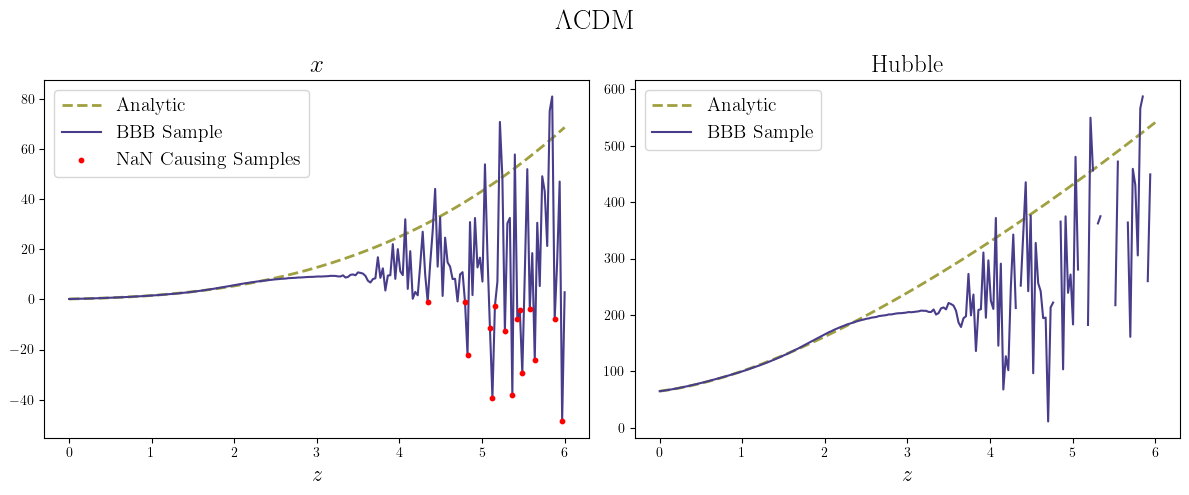

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

fig.suptitle("$\Lambda$CDM", fontsize=20)

axes[0].set_title("$x$", size=18)
axes[0].plot(data["x"].ravel(), data["analytic"].ravel(), 'olive', linestyle='--', alpha=0.75, linewidth=2, label="Analytic")
axes[0].plot(data["x"].ravel(), data["BBB_samples"][0][0].ravel(), label="BBB Sample", c="darkslateblue")
axes[0].scatter(data["x"].ravel()[np.isnan(hubble_samples[2][0]).ravel()], data["BBB_samples"][0][0].ravel()[np.isnan(hubble_samples[2][0]).ravel()], label="NaN Causing Samples", color="r", s=10, zorder=2.5)
axes[0].legend(prop={'size': 14})
axes[0].set_xlabel("$z$", size=16)

axes[1].set_title("Hubble", size=18)
axes[1].plot(data["x"].ravel(), hubble_samples[0].ravel(), label="Analytic", color="olive", linestyle="--", alpha=.75, linewidth=2)
axes[1].plot(data["x"].ravel(), hubble_samples[2][0].ravel(), label="BBB Sample", color="darkslateblue")
axes[1].legend(prop={'size': 14})
axes[1].set_xlabel("$z$", size=16)
fig.tight_layout()
fig.savefig("figures/hubble_nans.png")

In [77]:
hubble_mean = hubble_samples[2].mean(axis=0).ravel()
hubble_std = hubble_samples[2].std(axis=0).ravel()
hubble_nanmean = np.nanmean(hubble_samples[2], axis=0).ravel()
hubble_nanstd = np.nanstd(hubble_samples[2], axis=0).ravel()

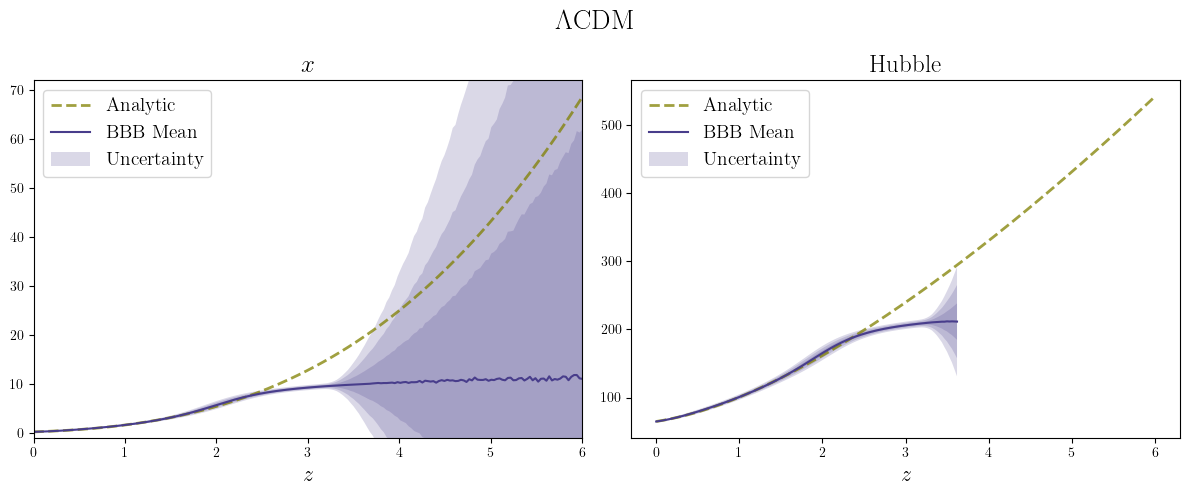

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

fig.suptitle("$\Lambda$CDM", fontsize=20)

axes[0].set_title("$x$", size=18)
axes[0].plot(data["x"].ravel(), data["analytic"].ravel(), 'olive', linestyle='--', alpha=0.75, linewidth=2, label='Analytic')
axes[0].plot(data["x"].ravel(), data["BBB_samples"][0].mean(axis=0), label="BBB Mean", c='darkslateblue')
axes[0].fill_between(data["x"].ravel(), data["BBB"][0].ravel()-1*data["BBB"][1].ravel(), data["BBB"][0].ravel()+1*data["BBB"][1].ravel(), color="darkslateblue", alpha=0.2, edgecolor=None, label='Uncertainty')
axes[0].fill_between(data["x"].ravel(), data["BBB"][0].ravel()-2*data["BBB"][1].ravel(), data["BBB"][0].ravel()+2*data["BBB"][1].ravel(), color="darkslateblue", alpha=0.2, edgecolor=None)
axes[0].fill_between(data["x"].ravel(), data["BBB"][0].ravel()-3*data["BBB"][1].ravel(), data["BBB"][0].ravel()+3*data["BBB"][1].ravel(), color="darkslateblue", alpha=0.2, edgecolor=None)
axes[0].legend(prop={'size': 14})
axes[0].set_xlabel("$z$", size=16)
axes[0].set_xlim(data["x"].min(), data["x"].max())
axes[0].set_ylim(-1, 72)

axes[1].set_title("Hubble", size=18)
axes[1].plot(data["x"].ravel(), hubble_samples[0].ravel(), 'olive', linestyle='--', alpha=0.75, linewidth=2, label='Analytic')
axes[1].plot(data["x"].ravel(), hubble_mean, label="BBB Mean", color="darkslateblue")
axes[1].fill_between(data["x"].ravel(), hubble_mean-1*hubble_std, hubble_mean+1*hubble_std, color="darkslateblue", alpha=0.2, edgecolor=None, label='Uncertainty')
axes[1].fill_between(data["x"].ravel(), hubble_mean-2*hubble_std, hubble_mean+2*hubble_std, color="darkslateblue", alpha=0.2, edgecolor=None)
axes[1].fill_between(data["x"].ravel(), hubble_mean-3*hubble_std, hubble_mean+3*hubble_std, color="darkslateblue", alpha=0.2, edgecolor=None)
axes[1].legend(prop={'size': 14})
axes[1].set_xlabel("$z$", size=16)
fig.tight_layout()
#fig.savefig("figures/hubble_nans.png")

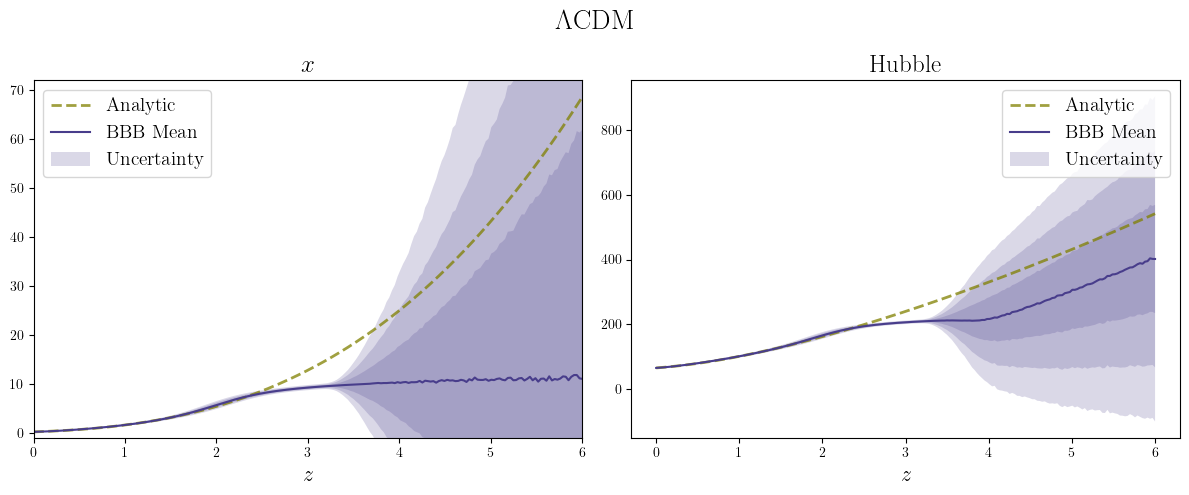

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

fig.suptitle("$\Lambda$CDM", fontsize=20)

axes[0].set_title("$x$", size=18)
axes[0].plot(data["x"].ravel(), data["analytic"].ravel(), 'olive', linestyle='--', alpha=0.75, linewidth=2, label='Analytic')
axes[0].plot(data["x"].ravel(), data["BBB_samples"][0].mean(axis=0), label="BBB Mean", c='darkslateblue')
axes[0].fill_between(data["x"].ravel(), data["BBB"][0].ravel()-1*data["BBB"][1].ravel(), data["BBB"][0].ravel()+1*data["BBB"][1].ravel(), color="darkslateblue", alpha=0.2, edgecolor=None, label='Uncertainty')
axes[0].fill_between(data["x"].ravel(), data["BBB"][0].ravel()-2*data["BBB"][1].ravel(), data["BBB"][0].ravel()+2*data["BBB"][1].ravel(), color="darkslateblue", alpha=0.2, edgecolor=None)
axes[0].fill_between(data["x"].ravel(), data["BBB"][0].ravel()-3*data["BBB"][1].ravel(), data["BBB"][0].ravel()+3*data["BBB"][1].ravel(), color="darkslateblue", alpha=0.2, edgecolor=None)
axes[0].legend(prop={'size': 14})
axes[0].set_xlabel("$z$", size=16)
axes[0].set_xlim(data["x"].min(), data["x"].max())
axes[0].set_ylim(-1, 72)

axes[1].set_title("Hubble", size=18)
axes[1].plot(data["x"].ravel(), hubble_samples[0].ravel(), 'olive', linestyle='--', alpha=0.75, linewidth=2, label='Analytic')
axes[1].plot(data["x"].ravel(), hubble_nanmean, label="BBB Mean", color="darkslateblue")
axes[1].fill_between(data["x"].ravel(), hubble_nanmean-1*hubble_nanstd, hubble_nanmean+1*hubble_nanstd, color="darkslateblue", alpha=0.2, edgecolor=None, label='Uncertainty')
axes[1].fill_between(data["x"].ravel(), hubble_nanmean-2*hubble_nanstd, hubble_nanmean+2*hubble_nanstd, color="darkslateblue", alpha=0.2, edgecolor=None)
axes[1].fill_between(data["x"].ravel(), hubble_nanmean-3*hubble_nanstd, hubble_nanmean+3*hubble_nanstd, color="darkslateblue", alpha=0.2, edgecolor=None)
axes[1].legend(prop={'size': 14})
axes[1].set_xlabel("$z$", size=16)
fig.tight_layout()
#fig.savefig("figures/hubble_nans.png")